# Implementing Stochastic Gradient Descent Classifier with Logloss and L2 regularization without sklearn


The full code is part of my [**this Kaggle Notebook**](https://www.kaggle.com/search#Implementing-SGD-Classifier-with-Logloss-and-L2-regularization-using-SGD-from-scratch-%28WITHOUT-using-sklearn%29)

### The Problem with Regular Gradient Descent

In machine learning, we are familiar with the concept of error and we are generally concerned with minimizing said error by modeling error as a function and defining the optimal model that has the lowest error

Recall in linear regression, we were concerned with minimizing the sum of squared residuals. In Calculus, to find the optimal point of a function, we must utilize the **derivative**.

In vector (multi-dimensional) calculus, we generalize the concept of the derivative as the gradient.

The gradient is the derivative of a single function of all of its variables. We use the gradient in order to create a **directional derivative**. The directional derivative gives us both a direction and magnitude of “how steep” the function is at that point and facing that direction. Our goal is to follow the directional derivatives to find the minimum (or maximum) value of a function.

**Gradient descent**, also known as **steepest descent**, is an optimization algorithm for finding the local minimum of a function. To find a local minimum, the function “steps” in the direction of the negative of the gradient. **Gradient ascent** is the same as gradient descent, except that it steps in the direction of the positive of the gradient and therefore finds local maximums instead of minimums. The algorithm of gradient descent can be outlined as follows:


![Imgur](https://imgur.com/qMT2obf.png)

![Imgur](https://imgur.com/AlVuPsx.png)


We can see from plot above that our local minimum is gonna be near around 1.4 or 1.5 (on the x-axis), but let’s pretend that we don’t know that, so we set our starting point (arbitrarily, in this case) at x_0=2

![Imgur](https://imgur.com/PGs9cA5.png)

![Imgur](https://imgur.com/LjhkqiK.png)



Why do we follow the negative gradient (negative derivatives?) Because to calculate the directional derivative we must do:

![Imgur](https://imgur.com/jWeYkn7.png)


Notice that in the method above (for regular Gradient Descent) we need to calculate the gradient in every step of our algorithm. In our example , this is not a big deal since there are only a hundred data points. But imagine that we had 2 million data points. If this were the case, it would certainly make the method above far less efficient.

In machine learning, the algorithm above is often called **batch gradient descent** to contrast it with **mini-batch gradient descent** (which we will not go into here) and **stochastic gradient descent**.

The implementation of the regular/classic gradient descent method consists of initially evaluating both the function and its gradient, starting from a configuration chosen randomly in the space of dimensions.

From here, we try to move in the direction indicated by the gradient. This establishes a direction of descent in which the function tends to a minimum and examines whether the function actually takes on a value lower than that calculated in the previous configuration. If so, the procedure continues iteratively, recalculating the new gradient. This can be totally different from the previous one. After this, it starts again in search of a new minimum.

This iterative procedure requires that, at each step, the entire system status is updated. This means that all the parameters of the system must be recalculated. From a computational point of view, this equates to an extremely expensive operating cost and greatly slows down the estimation procedure. With respect to the standard gradient descent method, in which the weights are updated after calculating the gradient for the entire dataset, in the stochastic method, the system parameters are updated after a certain number of examples. These are chosen randomly in order to speed up the process and to try and avoid any local minimum situations.

Consider a dataset that contains n observations of a phenomenon. Here, let f be an objective function that we want to minimize with respect to a series of parameters x. Here, we can write the following equation:

![Imgur](https://imgur.com/h8Xh3bW.png)

From the analysis of the previous equation, we can deduce that the evaluation of the objective function f requires n evaluations of the function f, one for each value contained in the dataset.

In the classic gradient descent method, at each step, the function gradient is calculated in correspondence with all the values of the dataset through the following equation:

![Imgur](https://imgur.com/dWqaeqc.png)

In some cases, the evaluation of the sum present in the previous equation can be particularly expensive, such as when the dataset is particularly large and there is no elementary expression for the objective function. The stochastic descent of the gradient solves this problem by introducing an approximation of the gradient function. At each step, instead of the sum of the gradients being evaluated in correspondence to the data contained in the dataset, the evaluation of the gradient is used only in a random subset of the dataset.

### Stochastic gradient descent vs classic gradient descent method¶

So, the previous equation replaces the following:

![Imgur](https://imgur.com/05iFjt8.png)

is the gradient of one of the observations in the dataset, chosen randomly.

The pros of this technique are as follows:

• Based only on a part of the observations, the algorithm allows a wider exploration of the parametric space, with the greater possibility of finding new and potentially better points of the minimum.

• Taking a step of the algorithm is computationally much faster, which ensures faster convergence toward the minimum point.

• The parameter estimates can also be calculated by loading only a part of the dataset into memory at a time, allowing this method to be applied to large datasets.

So, as we said above, in batch gradient descent, we must look at every example in the entire training set on every step (in cases where a training set is used for gradient descent). This can be quite slow if the training set is sufficiently large. In stochastic gradient descent, we update our values after looking at each item in the training set, so that we can start making progress right away. Recall the linear regression example above. In that example, we calculated the gradient for each of the two theta values as follows:

![Imgur](https://imgur.com/CXXaQXz.png)

When the sample data had a hundred data points as in the example above, calculating the gradient was not very costly. But for very large data sets, this would not be the case. So instead, we consider a stochastic gradient descent algorithm for simple linear regression such as the following, where m is the size of the data set:

![Imgur](https://imgur.com/KuLQFyL.png)

Typically, with stochastic gradient descent, you will run through the entire data set 1 to 10 times (see value for k in line 2 of the pseudocode above), depending on how fast the data is converging and how large the data set is.

With batch gradient descent, we must go through the entire data set before we make any progress. With this algorithm though, we can make progress right away and continue to make progress as we go through the data set. Therefore, stochastic gradient descent is often preferred when dealing with large data sets.

Unlike gradient descent, stochastic gradient descent will tend to oscillate near a minimum value rather than continuously getting closer. It may never actually converge to the minimum though. One way around this is to slowly decrease the step size αα as the algorithm runs. However, this is less common than using a fixed αα.

---

### Now the code implementation of SGD

In below there are some functions that start with the word "grader" ex: grader_weights(), grader_sigmoid(), grader_logloss() etc. This is for checking our intermediate functions, and every Grader function has to return True.

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
import matplotlib.pyplot as plt

### Creating custom dataset

In [2]:
# please don't change random_state
X, y = make_classification(n_samples=50000, n_features=15, n_informative=10, n_redundant=5,
                           n_classes=2, weights=[0.7], class_sep=0.7, random_state=15)
# make_classification is used to create custom dataset 
# - for more details - https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html

In [3]:
X.shape, y.shape

((50000, 15), (50000,))

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)

In [5]:
# Standardizing the data.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


''' 
From - https://datascience.stackexchange.com/a/65170/101199

sklearn generally doesn't apply scaling inside of any of its models, instead relying on the user to do that.  This seems like the right way to do it, since you might want to try different scaling techniques depending on your data.

From the [User Guide][1]:
> Stochastic Gradient Descent is sensitive to feature scaling, so it is highly recommended to scale your data. For example, scale each attribute on the input vector X to [0,1] or [-1,+1], or standardize it to have mean 0 and variance 1...  

  [1]: https://scikit-learn.org/stable/modules/sgd.html#tips-on-practical-use
'''

" \nFrom - https://datascience.stackexchange.com/a/65170/101199\n\nsklearn generally doesn't apply scaling inside of any of its models, instead relying on the user to do that.  This seems like the right way to do it, since you might want to try different scaling techniques depending on your data.\n\nFrom the [User Guide][1]:\n> Stochastic Gradient Descent is sensitive to feature scaling, so it is highly recommended to scale your data. For example, scale each attribute on the input vector X to [0,1] or [-1,+1], or standardize it to have mean 0 and variance 1...  \n\n  [1]: https://scikit-learn.org/stable/modules/sgd.html#tips-on-practical-use\n"

In [6]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((37500, 15), (37500,), (12500, 15), (12500,))

# <font color='red' size=5>SGD classifier</font>

In [7]:
# alpha : float
# Constant that multiplies the regularization term. 

# eta0 : double
# The initial learning rate for the ‘constant’, ‘invscaling’ or ‘adaptive’ schedules.

clf = linear_model.SGDClassifier(eta0=0.0001, alpha=0.0001, loss='log', random_state=15, penalty='l2', tol=1e-3, verbose=2, learning_rate='constant')
clf
# Please check this documentation (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html) 

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0001,
              fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
              loss='log', max_iter=1000, n_iter_no_change=5, n_jobs=None,
              penalty='l2', power_t=0.5, random_state=15, shuffle=True,
              tol=0.001, validation_fraction=0.1, verbose=2, warm_start=False)

In [8]:
# fitting our model
clf.fit(X=X_train, y=y_train)

-- Epoch 1
Norm: 0.70, NNZs: 15, Bias: -0.501317, T: 37500, Avg. loss: 0.552526
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 1.04, NNZs: 15, Bias: -0.752393, T: 75000, Avg. loss: 0.448021
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 1.26, NNZs: 15, Bias: -0.902742, T: 112500, Avg. loss: 0.415724
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 1.43, NNZs: 15, Bias: -1.003816, T: 150000, Avg. loss: 0.400895
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 1.55, NNZs: 15, Bias: -1.076296, T: 187500, Avg. loss: 0.392879
Total training time: 0.04 seconds.
-- Epoch 6
Norm: 1.65, NNZs: 15, Bias: -1.131077, T: 225000, Avg. loss: 0.388094
Total training time: 0.04 seconds.
-- Epoch 7
Norm: 1.73, NNZs: 15, Bias: -1.171791, T: 262500, Avg. loss: 0.385077
Total training time: 0.04 seconds.
-- Epoch 8
Norm: 1.80, NNZs: 15, Bias: -1.203840, T: 300000, Avg. loss: 0.383074
Total training time: 0.05 seconds.
-- Epoch 9
Norm: 1.86, NNZs: 15, Bias: -1.229563, T: 337500, Avg. loss: 0.

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0001,
              fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
              loss='log', max_iter=1000, n_iter_no_change=5, n_jobs=None,
              penalty='l2', power_t=0.5, random_state=15, shuffle=True,
              tol=0.001, validation_fraction=0.1, verbose=2, warm_start=False)

In [9]:
clf.coef_, clf.coef_.shape, clf.intercept_
#clf.coef_ will return the weights
#clf.coef_.shape will return the shape of weights
#clf.intercept_ will return the intercept term

(array([[-0.89007184,  0.63162363, -0.07594145,  0.63107107, -0.38434375,
          0.93235243, -0.89573521, -0.07340522,  0.40591417,  0.4199991 ,
          0.24722143,  0.05046199, -0.08877987,  0.54081652,  0.06643888]]),
 (1, 15),
 array([-1.30580538]))

## <font color='red' size=5> Implement Logistic Regression with L2 regularization Using SGD: without using sklearn </font>

After every function, we will be giving you expected output, please make sure that you get that output.

* Initialize the weight_vector and intercept term to zeros (Write your code in <font color='blue'>def initialize_weights()</font>)

* Create a loss function (Write your code in <font color='blue'>def logloss()</font>) 

 $log loss = -1*\frac{1}{n}\Sigma_{for each Yt,Y_{pred}}(Ytlog10(Y_{pred})+(1-Yt)log10(1-Y_{pred}))$
- for each epoch:

    - for each batch of data points in train: (keep batch size=1)

        - calculate the gradient of loss function w.r.t each weight in weight vector (write your code in <font color='blue'>def gradient_dw()</font>)

        $dw^{(t)} = x_n(y_n − σ((w^{(t)})^{T} x_n+b^{t}))- \frac{λ}{N}w^{(t)})$ <br>

        - Calculate the gradient of the intercept (write your code in <font color='blue'> def gradient_db()</font>) <a href='https://drive.google.com/file/d/1nQ08-XY4zvOLzRX-lGf8EYB5arb7-m1H/view?usp=sharing'>check this</a>

           $ db^{(t)} = y_n- σ((w^{(t)})^{T} x_n+b^{t}))$

        - Update weights and intercept (check the equation number 32 in the above mentioned <a href='https://drive.google.com/file/d/1nQ08-XY4zvOLzRX-lGf8EYB5arb7-m1H/view?usp=sharing'>pdf</a>): <br>
        $w^{(t+1)}← w^{(t)}+α(dw^{(t)}) $<br>

        $b^{(t+1)}←b^{(t)}+α(db^{(t)}) $
    - calculate the log loss for train and test with the updated weights 
    - And if you wish, you can compare the previous loss and the current loss, if it is not updating, then
        you can stop the training
    - append this loss in the list ( this will be used to see how loss is changing for each epoch after the training is over )

---

### On  the point of - if the loss is not updating then stop the process

Here I am considering test loss because test set are not seen by your system (model), if you monitor train loss you would most probably be overfitting (because your model has already seen the data and can just remember the data points (so your loss will be really low for train but high will be for test)), you guide your model via test set (assuming test set distribution would reflect real world data).

And also don't stop when "previous loss and the current loss are same" have a "patient" value, meaning you wait for few epochs and see if current loss is smaller than previous loss, lets say for 5 epochs, the reason we do this is gradient could be noisy sometimes due to multiple of factor (smaller batch size, big learning rate and so on), so you need to give some patient before you terminate the learning process.



<font color='blue'>Initialize weights </font>

In [10]:
# Randomly initializing weights (w) and intercept values (b)
# dim — size of the w vector we want (or number of features or parameters in this case)
def initialize_weights(dim):
    ''' In this function, we will initialize our weights and bias
    w — weights, a numpy array of size
    b — bias, a scalar
    '''
    #initialize the weights to zeros array of (1,dim) dimensions
    #you use zeros_like function to initialize zero, check this link https://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros_like.html
    #initialize bias to zero
    w = np.zeros_like(dim)
    # Above will initialize all w with 0.
    b = 0
    return w,b

<font color='cyan'>Grader function - 1 </font>

In [11]:
dim=X_train[0] 
w,b = initialize_weights(dim)
def grader_weights(w,b):
  assert((len(w)==len(dim)) and b==0 and np.sum(w)==0.0)
  return True
grader_weights(w,b)

True

<font color='blue'>Compute sigmoid </font>

$sigmoid(z)= 1/(1+exp(-z))$

In [12]:
def sigmoid(z):
    return 1.0/(1 + np.exp(-z))

In [13]:
def grader_sigmoid(z):
  val=sigmoid(z)
  assert(val==0.8807970779778823)
  return True
grader_sigmoid(2)

True

<font color='blue'> Compute loss </font>

## $$ log loss = -1 * \frac{1}{n}\Sigma_{for each Y^t, Y_{pred}}(Y^t log10(Y_{pred}) + (1-Y^t) log10(1-Y_{pred})) $$

In [14]:
def logloss(y_true,y_pred):
    sum_of_loss = 0
    for i in range(len(y_true)):
        sum_of_loss += ((y_true[i] * np.log10(y_pred[i])) + ((1-y_true[i]) * np.log10(1-y_pred[i])))

    loss = -1*(1/len(y_true))*sum_of_loss

    return loss

<font color='cyan'>Grader function - 3 </font>

In [15]:
def grader_logloss(true,pred):
  loss=logloss(true,pred)
  assert(loss==0.07644900402910389)
  return True
true=[1,1,0,1,0]
pred=[0.9,0.8,0.1,0.8,0.2]
grader_logloss(true,pred)

True

<font color='blue'>Compute gradient w.r.to  'w' </font>

$dw^{(t)} = x_n(y_n − σ((w^{(t)})^{T} x_n+b^{t}))- \frac{λ}{N}w^{(t)}$ <br>

In [16]:
def gradient_dw(x,y,w,b,alpha,N):
    '''In this function, we will compute the gardient w.r.to w '''
    z = np.dot(w, x) + b
    dw = x*(y - sigmoid(z)) - ((alpha)*(1/N) * w)
    return dw


## Special note on above gradient_dw() function

### How am I multiplying np.dot(w, x) in below function given w is 1-d array with 15 elements i.e. 15 columns and X is a 2-D array with 50,000 rows and 15 columns

```py
def gradient_dw(x,y,w,b,alpha,N):
    '''In this function, we will compute the gardient w.r.to w '''
    z = np.dot(w, x) + b
    dw = x*(y - sigmoid(z)) - ((alpha)*(1/N) * w)
    return dw

```

If w = (1, 15) and X = (100, 15), you can NOT do `w.dot(x)` because

#### Columns of w should match rows of x

When we do multiplication:

The number of columns of the 1st matrix must equal the number of rows of the 2nd matrix.
And the result will have the same number of rows as the 1st matrix, and the same number of columns as the 2nd matrix.

#### To multiply an m×n matrix by an n×p matrix, the n's must be the same, and the result is an m×p matrix.

### $$(m×n) × (n×p) => m×p$$


Thats why we should take transpose of w which would make matrix multiplication possible like w.T = (15, 1) now if you take `w.dot(x)` it will return you 1X100 shaped vector. Notice after transpose of W how rows of W and columns of X are matching, and weights are represented as rows rather than columns.


#### But the question is in my above `gradient_dw()` how come I am NOT doing this above transpose

#### To understand that we have to investigate [Does np.dot automatically transpose vectors?](https://stackoverflow.com/questions/54160155/does-np-dot-automatically-transpose-vectors)

 It seems that when one of your matrices is one dimensional, then numpy will figure out automatically what you are trying to do.


[The documentation][1] for the dot function has a more specific explanation of the logic applied:

* If both a and b are 1-D arrays, it is inner product of vectors (without complex conjugation).

* If both a and b are 2-D arrays, it is matrix multiplication, but using matmul or a @ b is preferred.

* If either a or b is 0-D (scalar), it is equivalent to multiply and using numpy.multiply(a, b) or a * b is preferred.

* If a is an N-D array and b is a 1-D array, it is a sum product over the last axis of a and b. (THIS IS WHAT IS BEING APPLIED HERE IN THE CASE OF OUR gradient_dw() function)

* If a is an N-D array and b is an M-D array (where M>=2), it is a sum product over the last axis of a and the second-to-last axis of b:


  [1]: https://numpy.org/doc/stable/reference/generated/numpy.dot.html?highlight=dot#numpy.dot

<font color='cyan'>Grader function - 4 </font>

In [17]:
def grader_dw(x,y,w,b,alpha,N):
  grad_dw=gradient_dw(x,y,w,b,alpha,N)
  assert(np.sum(grad_dw)==2.613689585)
  return True
grad_x=np.array([-2.07864835,  3.31604252, -0.79104357, -3.87045546, -1.14783286,
       -2.81434437, -0.86771071, -0.04073287,  0.84827878,  1.99451725,
        3.67152472,  0.01451875,  2.01062888,  0.07373904, -5.54586092])
grad_y=0
grad_w,grad_b=initialize_weights(grad_x)
alpha=0.0001
N=len(X_train)
grader_dw(grad_x,grad_y,grad_w,grad_b,alpha,N)

True

<font color='blue'>Compute gradient w.r.to 'b' </font>

$ db^{(t)} = y_n- σ((w^{(t)})^{T} x_n+b^{t})$

In [18]:
def gradient_db(x,y,w,b):
    z = np.dot(w, x) + b
    db = y - sigmoid(z)

    return db

<font color='cyan'>Grader function - 5 </font>

In [19]:
def grader_db(x,y,w,b):
  grad_db=gradient_db(x,y,w,b)
  assert(grad_db==-0.5)
  return True
grad_x=np.array([-2.07864835,  3.31604252, -0.79104357, -3.87045546, -1.14783286,
       -2.81434437, -0.86771071, -0.04073287,  0.84827878,  1.99451725,
        3.67152472,  0.01451875,  2.01062888,  0.07373904, -5.54586092])
grad_y=0
grad_w,grad_b=initialize_weights(grad_x)
alpha=0.0001
N=len(X_train)
grader_db(grad_x,grad_y,grad_w,grad_b)

True

<font color='blue'> Implementing logistic regression</font>

In [20]:
def train(X_train, y_train, X_test, y_test, epochs, alpha, eta0, tol=1e-3):
    """ In this function, we will implement logistic regression"""
    # Here eta0 is learning rate
    # implement the code as follows
    # initialize the weights (call the initialize_weights(X_train[0]) function)
    w, b = initialize_weights(X_train[0])
    # for every epoch
    train_loss = []
    test_loss = []
    N = len(X_train)

    loss_threshold = 0.0001

    while True:
        for epoch in range(epochs):            
            
            # for every data point(X_train,y_train)
            for row in range(N - 1):
                # compute gradient w.r.to w (call the gradient_dw() function)
                delta_weights = gradient_dw(
                    X_train[row], y_train[row], w, b, alpha, len(X_train)
                )

                # compute gradient w.r.to b (call the gradient_db() function)
                delta_bias = gradient_db(X_train[row], y_train[row], w, b)

                # update w, b
                w = w + eta0 * delta_weights
                b = b + eta0 * delta_bias

            # predict the output of x_train[for all data points in X_train] using w,b
            # y_prediction_train — a numpy array (vector) containing all predictions (0/1) for the examples in X
            y_prediction_train = [  
            sigmoid(np.dot(w, x_row) + b) for x_row in X_train
            ]

            # compute the loss between predicted and actual values (call the loss function)
            # store all the train loss values in a list
            train_loss.append(logloss(y_train, y_prediction_train))

            # predict the output of x_test[for all data points in X_test] using w,b
            y_prediction_test = [
                sigmoid(np.dot(w, x_row) + b) for x_row in X_test
            ]

            print(
                f"For EPOCH No : {epoch} Train Loss is : {logloss(y_train, y_prediction_train)} and Test Loss is : {logloss(y_test, y_prediction_test)}"
            )

            # compute the loss between predicted and actual values (call the loss function)
            test_loss.append(logloss(y_test, y_prediction_test))

        # you can also compare previous loss and current loss
        # if the loss is not updating then stop the process and return w,b
        # i.e. loss is still reducing with each epoch but the reduction is insignificant ( < loss_threshold )
        if (
            len(test_loss) > 3
            and (test_loss[-2] - test_loss[-1]) > 0
            and (test_loss[-2] - test_loss[-1])
        ) < loss_threshold:
            break

    return w, b, train_loss, test_loss
    

In [21]:
alpha=0.0001
eta0=0.0001
N=len(X_train)
epochs=50

w,b, train_loss, test_loss =train(X_train,y_train,X_test,y_test,epochs,alpha,eta0)

# print("Weights from custom implementations ",  w)
# print("Intercept b from custom implementations ", b)

For EPOCH No : 0 Train Loss is : 0.20729876546330706 and Test Loss is : 0.2072225627554031
For EPOCH No : 1 Train Loss is : 0.18556307486085272 and Test Loss is : 0.18565280665489842
For EPOCH No : 2 Train Loss is : 0.17659720169678442 and Test Loss is : 0.17682550630341304
For EPOCH No : 3 Train Loss is : 0.17201336774946202 and Test Loss is : 0.17235280771147948
For EPOCH No : 4 Train Loss is : 0.16938035193673734 and Test Loss is : 0.1698094791351209
For EPOCH No : 5 Train Loss is : 0.16775362865599033 and Test Loss is : 0.16825589479952285
For EPOCH No : 6 Train Loss is : 0.16669797634806888 and Test Loss is : 0.16726046448034526
For EPOCH No : 7 Train Loss is : 0.1659885582650497 and Test Loss is : 0.16660104550000873
For EPOCH No : 8 Train Loss is : 0.1654993480217648 and Test Loss is : 0.16615364360344456
For EPOCH No : 9 Train Loss is : 0.1651552959688971 and Test Loss is : 0.1658447675972595


### Comparing our above Custom from-scratch implementation with Sikit Learn's SGDClassifier's implementation by calculating the differences of the weights and intercept terms

In [ ]:
# From Scikit-Learn's SGDClassifier's implementation as done at the top of this file
# the weights and intercept were clf.coef and clf.intercept_
# So printing the difference below between them
print("w-clf.coef_ ", w-clf.coef_)
print("b-clf.intercept_ ", b-clf.intercept_)

w-clf.coef_  [[-0.08131849  0.06368005 -0.03055416  0.05043961 -0.06035257  0.07561722
  -0.04763114  0.000364    0.04056776  0.05818547  0.02680422  0.00971967
  -0.00728562  0.02954035 -0.00241388]]
b-clf.intercept_  [-0.06322387]


## If I dont do Standardization (by commenting out StandardScaler related 3 lines of code at the top) on train and test data, my result is closest to scikit-learn's

i.e. ONLY in this case, our custom implementation and SGDClassifier's the weights, are the closest with difference in terms of 10^-3

```
w-clf.coef_  [[-0.00657559  0.00772178  0.00016917 -0.00345672 -0.0130416   0.00973689
   0.00729834  0.00433923  0.01296269 -0.00698266  0.00168893 -0.00475045
  -0.00164603  0.00046798  0.00031031]]
b-clf.intercept_  [-0.03904606]
```

This is expected as I mentioned earlier that  

sklearn generally doesn't apply scaling inside of any of its models, instead relying on the user to do that.  This seems like the right way to do it, since you might want to try different scaling techniques depending on your data.

[source](https://datascience.stackexchange.com/a/65170/101199)

From the [User Guide][1]:
> Stochastic Gradient Descent is sensitive to feature scaling, so it is highly recommended to scale your data. For example, scale each attribute on the input vector X to [0,1] or [-1,+1], or standardize it to have mean 0 and variance 1...  

  [1]: https://scikit-learn.org/stable/modules/sgd.html#tips-on-practical-use
'''

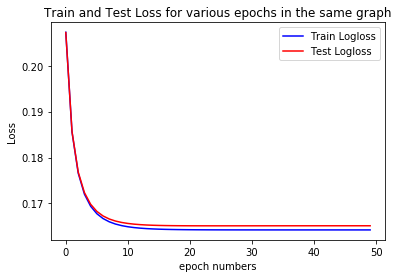

In [ ]:
x = np.array([i for i in range(0, 50)])

train_log_loss = np.array(train_loss)
test_log_loss = np.array(test_loss)

plt.plot(x, train_log_loss, "-b", label="Train Logloss")
plt.plot(x, test_log_loss, "-r", label="Test Logloss")

plt.legend(loc="upper right")

plt.xlabel('epoch numbers')
plt.ylabel('Loss')
plt.title('Train and Test Loss for various epochs in the same graph')
plt.show()

<font color='blue'>Plot epoch number vs train , test loss </font>

* epoch number on X-axis
* loss on Y-axis

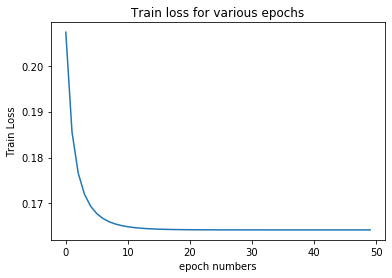

In [ ]:
x = np.array([i for i in range(0, 50)])
y = np.array(train_loss)
plt.plot(x, y)
plt.xlabel('epoch numbers')
plt.ylabel('Train Loss')
plt.title('Train loss for various epochs')
plt.show()

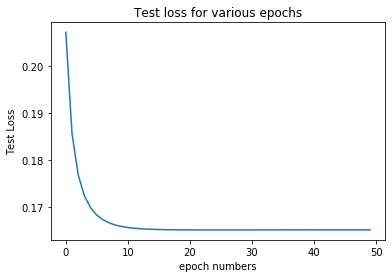

In [ ]:
x = np.array([i for i in range(0, 50)])
y = np.array(test_loss)
plt.plot(x, y)
plt.xlabel('epoch numbers')
plt.ylabel('Test Loss')
plt.title('Test loss for various epochs')
plt.show()

In [ ]:
def pred(w,b, X):
    N = len(X)
    predict = []
    for i in range(N):
        z=np.dot(w,X[i])+b
        if sigmoid(z) >= 0.5: # sigmoid(w,x,b) returns 1/(1+exp(-(dot(x,w)+b)))
            predict.append(1)
        else:
            predict.append(0)
    return np.array(predict)
print(1-np.sum(y_train - pred(w,b,X_train))/len(X_train))
print(1-np.sum(y_test  - pred(w,b,X_test))/len(X_test))

0.95184
0.94936
